In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

np.random.seed(0)

In [2]:
csv_file = 'data/TCGA_labels.csv'
df = pd.read_csv(csv_file)
df.head()

,Variant_Classification,ABCB9..ENSG00023457,ABLIM1..ENSG0003983,ACTA2..ENSG00059,ACTB..ENSG00060,ADORA2B..ENSG000136,ADRB2..ENSG000154,AEBP2..ENSG000121536,AEN..ENSG00064782,AGAP1..ENSG000116987,...,ZCCHC2..ENSG00054877,ZDHHC14..ENSG00079683,ZFP36L1..ENSG000677,ZMAT3..ENSG00064393,ZMIZ1..ENSG00057178,ZMIZ2..ENSG00083637,ZMYND8..ENSG00023613,ZNF561..ENSG00093134,is_true,mutation
0,A129Vfs*20_TCGA-66-2785_Frame_Shift_Ins_17:g.7...,376.831000,1358.86000,2471.580000,143602.00000,159.674000,63.136500,946.639000,626.477000,344.195000,...,323.344000,75.356400,8558.040000,43.991900,1783.300000,5320.570000,1018.330000,821.181000,True,Frame_Shift_Ins
1,A138_P142del_TCGA-25-2393_In_Frame_Del_17:g.75...,198.244448,5367.62179,2528.570328,77726.97678,19.656121,2.579692,2130.976296,732.991931,386.605718,...,228.638412,322.247574,6446.509718,36.542642,3207.438557,3213.116903,1688.261865,1149.407697,True,In_Frame_Del
2,A138Cfs*27_TCGA-55-6980_Frame_Shift_Del_17:g.7...,117.516000,1936.34000,14533.700000,185841.00000,95.490700,191.866000,766.578000,256.410000,239.611000,...,230.672000,121.132000,12726.800000,74.270600,2496.910000,4005.300000,923.961000,391.689000,True,Frame_Shift_Del
3,A138Cfs*27_TCGA-55-6980_Frame_Shift_Del_17:g.7...,60.747000,5667.60000,3560.420000,107645.00000,86.834700,1047.620000,698.413000,186.741000,262.372000,...,638.609000,343.604000,8024.280000,78.431400,3746.030000,2692.810000,1168.070000,670.402000,True,Frame_Shift_Del
4,A138Cfs*27_TCGA-D8-A13Y_Frame_Shift_Del_17:g.7...,327.477000,1096.61000,3430.480000,64166.60000,51.837300,9.491300,706.010000,1617.540000,821.366000,...,806.811000,124.118000,1350.690000,237.649000,1885.860000,2283.400000,1967.630000,480.043000,True,Frame_Shift_Del


## True vs False

In [3]:
df_full = df
df = df.drop(columns=['is_true', 'mutation', 'Variant_Classification'])
y = df_full['is_true']

In [12]:
(y == 0).sum() / len(y)

0.5509380194728093

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [7]:
from classification import hyperparameter_search, plot_hyperparameter_search_results
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
best_model, best_params, best_score, all_results = hyperparameter_search(model, X_train, y_train, X_val, y_val, param_grid, search_type='grid', cv=3, verbose=2)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_s

In [13]:
best_score

0.5445328567218463

In [14]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)
print(f"Test accuracy of best model: {accuracy_score(y_test, y_pred):.2f}")

Test accuracy: 0.55


In [ ]:
plot_hyperparameter_search_results(all_results, param_grid)
plt.show()

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Mutation prediction

In [3]:
csv_file = 'data/TCGA_labels.csv'
df = pd.read_csv(csv_file)
df.head()

,Variant_Classification,ABCB9..ENSG00023457,ABLIM1..ENSG0003983,ACTA2..ENSG00059,ACTB..ENSG00060,ADORA2B..ENSG000136,ADRB2..ENSG000154,AEBP2..ENSG000121536,AEN..ENSG00064782,AGAP1..ENSG000116987,...,ZCCHC2..ENSG00054877,ZDHHC14..ENSG00079683,ZFP36L1..ENSG000677,ZMAT3..ENSG00064393,ZMIZ1..ENSG00057178,ZMIZ2..ENSG00083637,ZMYND8..ENSG00023613,ZNF561..ENSG00093134,is_true,mutation
0,A129Vfs*20_TCGA-66-2785_Frame_Shift_Ins_17:g.7...,376.831000,1358.86000,2471.580000,143602.00000,159.674000,63.136500,946.639000,626.477000,344.195000,...,323.344000,75.356400,8558.040000,43.991900,1783.300000,5320.570000,1018.330000,821.181000,True,Frame_Shift_Ins
1,A138_P142del_TCGA-25-2393_In_Frame_Del_17:g.75...,198.244448,5367.62179,2528.570328,77726.97678,19.656121,2.579692,2130.976296,732.991931,386.605718,...,228.638412,322.247574,6446.509718,36.542642,3207.438557,3213.116903,1688.261865,1149.407697,True,In_Frame_Del
2,A138Cfs*27_TCGA-55-6980_Frame_Shift_Del_17:g.7...,117.516000,1936.34000,14533.700000,185841.00000,95.490700,191.866000,766.578000,256.410000,239.611000,...,230.672000,121.132000,12726.800000,74.270600,2496.910000,4005.300000,923.961000,391.689000,True,Frame_Shift_Del
3,A138Cfs*27_TCGA-55-6980_Frame_Shift_Del_17:g.7...,60.747000,5667.60000,3560.420000,107645.00000,86.834700,1047.620000,698.413000,186.741000,262.372000,...,638.609000,343.604000,8024.280000,78.431400,3746.030000,2692.810000,1168.070000,670.402000,True,Frame_Shift_Del
4,A138Cfs*27_TCGA-D8-A13Y_Frame_Shift_Del_17:g.7...,327.477000,1096.61000,3430.480000,64166.60000,51.837300,9.491300,706.010000,1617.540000,821.366000,...,806.811000,124.118000,1350.690000,237.649000,1885.860000,2283.400000,1967.630000,480.043000,True,Frame_Shift_Del


In [4]:
df_full = df
df = df.drop(columns=['is_true', 'mutation', 'Variant_Classification'])
y = df_full['mutation']

In [5]:
y.value_counts() / len(y)

mutation
Missense_Mutation         0.642840
Nonsense_Mutation         0.129898
Frame_Shift_Del           0.093090
Splice_Site               0.066018
Frame_Shift_Ins           0.028734
In_Frame_Del              0.018048
Splice_Region             0.011874
Fusion_                   0.005937
In_Frame_Ins              0.003325
Translation_Start_Site    0.000237
Name: count, dtype: float64

In [8]:
y = y.apply(lambda x: 1 if x == 'Missense_Mutation' else 0)
y.value_counts() / len(y)

mutation
1    0.64284
0    0.35716
Name: count, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [10]:
from classification import hyperparameter_search, plot_hyperparameter_search_results
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
best_model, best_params, best_score, all_results = hyperparameter_search(model, X_train, y_train, X_val, y_val, param_grid, search_type='grid', cv=3, verbose=2)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   4.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   5.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_s

In [11]:
best_score

0.6297491175967945

In [12]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)
print(f"Test accuracy of best model: {accuracy_score(y_test, y_pred):.2f}")

Test accuracy of best model: 0.66


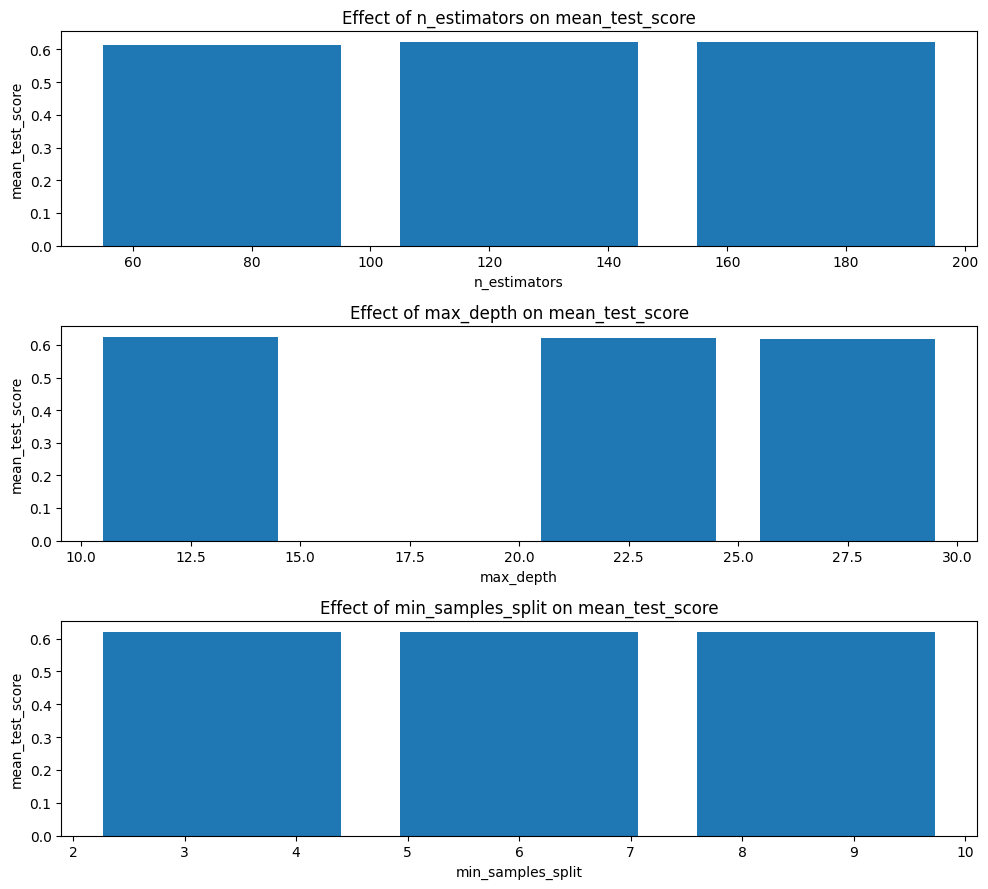

In [15]:
plot_hyperparameter_search_results(all_results, param_grid)

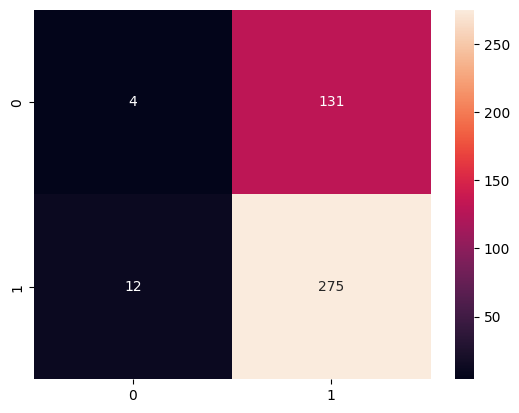

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()